In [ ]:
import sys
sys.version_info
print(sys.version)

Train Samples: 5000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0084,LA_T_4807785,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0082,LA_T_8193150,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


Valid Samples: 4000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0102,LA_D_3555645,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0070,LA_D_2944634,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


Test Samples: 4000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0055,LA_E_6097135,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0051,LA_E_4471664,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


> Filename: LA_T_9557645 | Label: bonafide
# Listen


# Plot



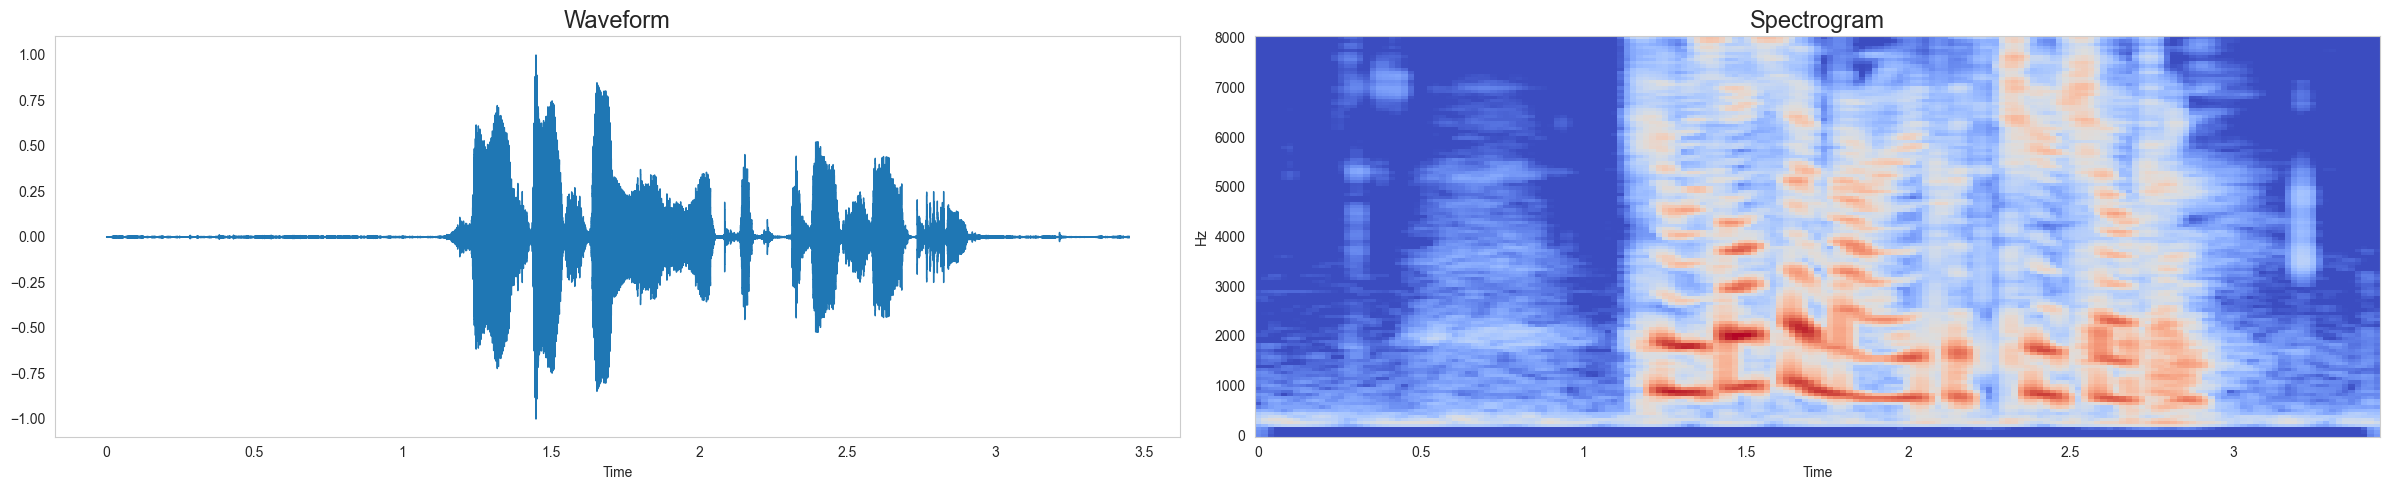

In [10]:

# display(test_df.groupby(['fold','target']).size())

fold  target
0.0   0         200
      1         200
1.0   0         200
      1         200
2.0   0         200
      1         200
3.0   0         200
      1         200
4.0   0         200
      1         200
5.0   0         200
      1         200
6.0   0         200
      1         200
7.0   0         200
      1         200
8.0   0         200
      1         200
9.0   0         200
      1         200
dtype: int64

9.0    500
0.0    500
1.0    500
4.0    500
7.0    500
3.0    500
5.0    500
8.0    500
6.0    500
2.0    500
Name: fold, dtype: int64

In [21]:
# BASE_PATH = '~/icloud/Downloads/asvspoof/LA'
FOLDS = 10
SEED = 101
DEBUG = True

# Audio params
SAMPLE_RATE = 16000
DURATION = 5.0 # duration in second
AUDIO_LEN = int(SAMPLE_RATE * DURATION)

# Spectrogram params
N_MELS = 128 # freq axis
N_FFT = 2048
SPEC_WIDTH = 256 # time axis
HOP_LEN = AUDIO_LEN//(SPEC_WIDTH - 1) # non-overlap region
FMAX = SAMPLE_RATE//2 # max frequency
SPEC_SHAPE = [SPEC_WIDTH, N_MELS] # output spectrogram shape

In [22]:
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32') # set labels 1 for fake and 0 for real
if DEBUG:
    train_df = train_df.groupby(['target']).sample(2500).reset_index(drop=True)
print(f'Train Samples: {len(train_df)}')
train_df.head(2)

Train Samples: 5000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0085,LA_T_2441274,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0097,LA_T_1235793,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


In [23]:
valid_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt',
                       sep=" ", header=None)
valid_df.columns =['speaker_id','filename','system_id','null','class_name']
valid_df.drop(columns=['null'],inplace=True)
valid_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_dev/flac/'+valid_df.filename+'.flac'
valid_df['target'] = (valid_df.class_name=='spoof').astype('int32')
if DEBUG:
    valid_df = valid_df.groupby(['target']).sample(2000).reset_index(drop=True)
print(f'Valid Samples: {len(valid_df)}')
valid_df.head(2)

Valid Samples: 4000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0106,LA_D_3198087,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0069,LA_D_1403371,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


In [24]:
test_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt',
                      sep=" ", header=None)
test_df.columns =['speaker_id','filename','system_id','null','class_name']
test_df.drop(columns=['null'],inplace=True)
test_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_eval/flac/'+test_df.filename+'.flac'
test_df['target'] = (test_df.class_name=='spoof').astype('int32')
if DEBUG:
    test_df = test_df.groupby(['target']).sample(2000).reset_index(drop=True)
print(f'Test Samples: {len(test_df)}')
test_df.head(2)

Test Samples: 4000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0009,LA_E_8325577,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0042,LA_E_6173284,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


In [25]:
def load_audio(path, sr=16000):
    """load audio from .wav file
    Args:
        path: file path of .wav file
        sr: sample rate
    Returns:
        audio, sr
    """
    audio, sr = librosa.load(path, sr=sr)
    return audio, sr

def plot_audio(audio, sr=16000):
    fig = librosa.display.waveshow(audio,
                                   x_axis='time',
                                   sr=sr)
    return fig

def listen_audio(audio, sr=16000):
    display(ipd.Audio(audio, rate=sr))

def get_spec(audio):
    spec = librosa.feature.melspectrogram(audio, fmax=FMAX, n_mels=N_MELS, hop_length=HOP_LEN, n_fft=N_FFT)
    spec = librosa.power_to_db(spec)
    return spec

def plot_spec(spec, sr=16000):
    fig = librosa.display.specshow(spec,
                                   x_axis='time',
                                   y_axis='hz',
                                   hop_length=HOP_LEN,
                                   sr=SAMPLE_RATE,
                                   fmax=FMAX,)
    return fig

In [26]:
# listen_audio(LA_T_3685206.flac)

> Filename: LA_T_9363134 | Label: bonafide
# Listen


# Plot



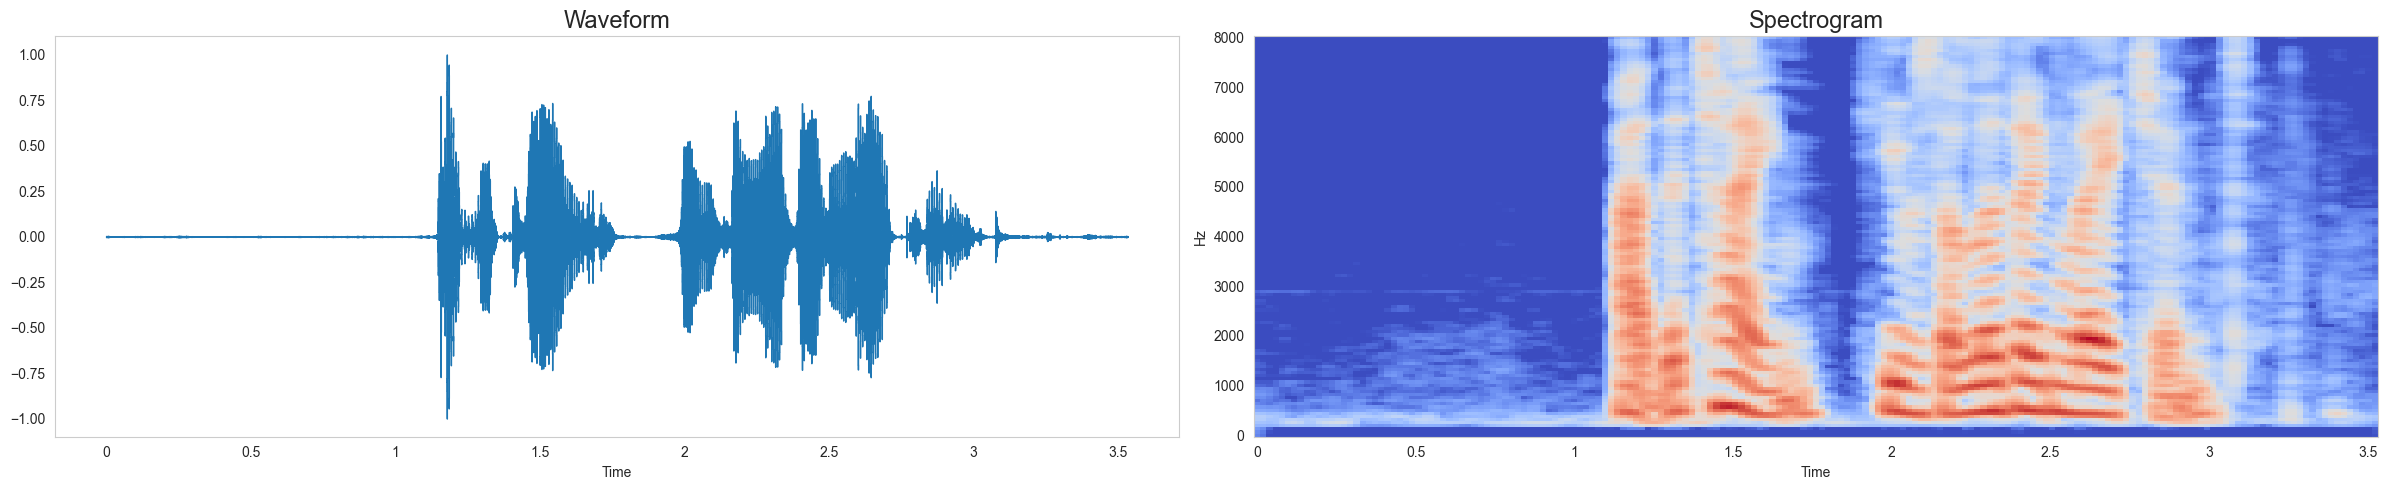

In [27]:
row = train_df[train_df.target==0].iloc[10]
print(f'> Filename: {row.filename} | Label: {row.class_name}')
audio, sr= load_audio(row.filepath, sr=None)
audio = audio[:AUDIO_LEN]
spec = get_spec(audio)

print('# Listen')
listen_audio(audio, sr=16000)

print("# Plot\n")
plt.figure(figsize=(12*2,5))

plt.subplot(121)
plot_audio(audio)
plt.title("Waveform",fontsize=17)

plt.subplot(122)
plot_spec(spec);
plt.title("Spectrogram",fontsize=17)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)

# Split train data into folds
for fold, (_, val_idx) in enumerate(skf.split(train_df, y=train_df['target'])):
    train_df.loc[val_idx, 'fold'] = fold

# Split valid data into folds
for fold, (_, val_idx) in enumerate(skf.split(valid_df, y=valid_df['target'])):
    valid_df.loc[val_idx, 'fold'] = fold

# Split test data into folds
for fold, (_, val_idx) in enumerate(skf.split(test_df, y=test_df['target'])):
    test_df.loc[val_idx, 'fold'] = fold
display(test_df.groupby(['fold','target']).size())

fold  target
0.0   0         200
      1         200
1.0   0         200
      1         200
2.0   0         200
      1         200
3.0   0         200
      1         200
4.0   0         200
      1         200
5.0   0         200
      1         200
6.0   0         200
      1         200
7.0   0         200
      1         200
8.0   0         200
      1         200
9.0   0         200
      1         200
dtype: int64

In [29]:
train_df.fold.value_counts()

9.0    500
0.0    500
1.0    500
4.0    500
7.0    500
3.0    500
5.0    500
8.0    500
6.0    500
2.0    500
Name: fold, dtype: int64

In [30]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

In [31]:
def train_serialize_example(feature0, feature1, feature2,
                            feature3, feature4,feature5,feature6):
    feature = {
        'audio':_bytes_feature(feature0),
        'id':_bytes_feature(feature1),
        'speaker_id':_bytes_feature(feature2),
        'system_id':_bytes_feature(feature3),
        'class_name':_bytes_feature(feature4),
        'audio_len':_int64_feature(feature5),
        'target':_int64_feature(feature6),
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [32]:
os.makedirs('/tmp/asvspoof', exist_ok=True)

In [33]:
def write_tfrecord(df, split='train', show=True):
    df = df.copy()
    folds = sorted(df.fold.unique().tolist())
    for fold in tqdm(folds): # create tfrecord for each fold
        fold_df = df.query("fold==@fold").sample(frac=1.0)
        if show:
            print(); print('Writing %s TFRecord of fold %i :'%(split,fold))
        with tf.io.TFRecordWriter('/tmp/asvspoof/%s%.2i-%i.tfrec'%(split,fold,fold_df.shape[0])) as writer:
            samples = fold_df.shape[0] # samples = 200
            it = tqdm(range(samples)) if show else range(samples)
            for k in it: # images in fold
                row = fold_df.iloc[k,:]
                audio, sr = load_audio(row['filepath'])
                audio_id = row['filename']
                speaker_id = row['speaker_id']
                system_id = row['system_id']
                class_name = row['class_name']
                target = row['target']
                example  = train_serialize_example(
                    tf.audio.encode_wav(audio[...,None],sample_rate=sr),
                    str.encode(audio_id),
                    str.encode(speaker_id),
                    str.encode(system_id),
                    str.encode(class_name),
                    len(audio),
                    int(target),
                )
                writer.write(example)
            if show:
                filepath = '/tmp/asvspoof/%s%.2i-%i.tfrec'%(split,fold,fold_df.shape[0])
                filename = filepath.split('/')[-1]
                filesize = os.path.getsize(filepath)/10**6
                print(filename,':',np.around(filesize, 2),'MB')

In [34]:
# write_tfrecord(train_df,split='train', show=True)

In [35]:
# write_tfrecord(valid_df,split='valid', show=True)

In [36]:
# write_tfrecord(test_df,split='test', show=True)

In [39]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE
TRAIN_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/train*.tfrec')
VALID_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/valid*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/test*.tfrec')
print('There are %i train, %i valid & %i test images'%(count_data_items(TRAIN_FILENAMES),
                                                       count_data_items(VALID_FILENAMES),
                                                       count_data_items(TEST_FILENAMES)))

There are 5000 train, 4000 valid & 4000 test images


2023-07-23 21:06:42.738783: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


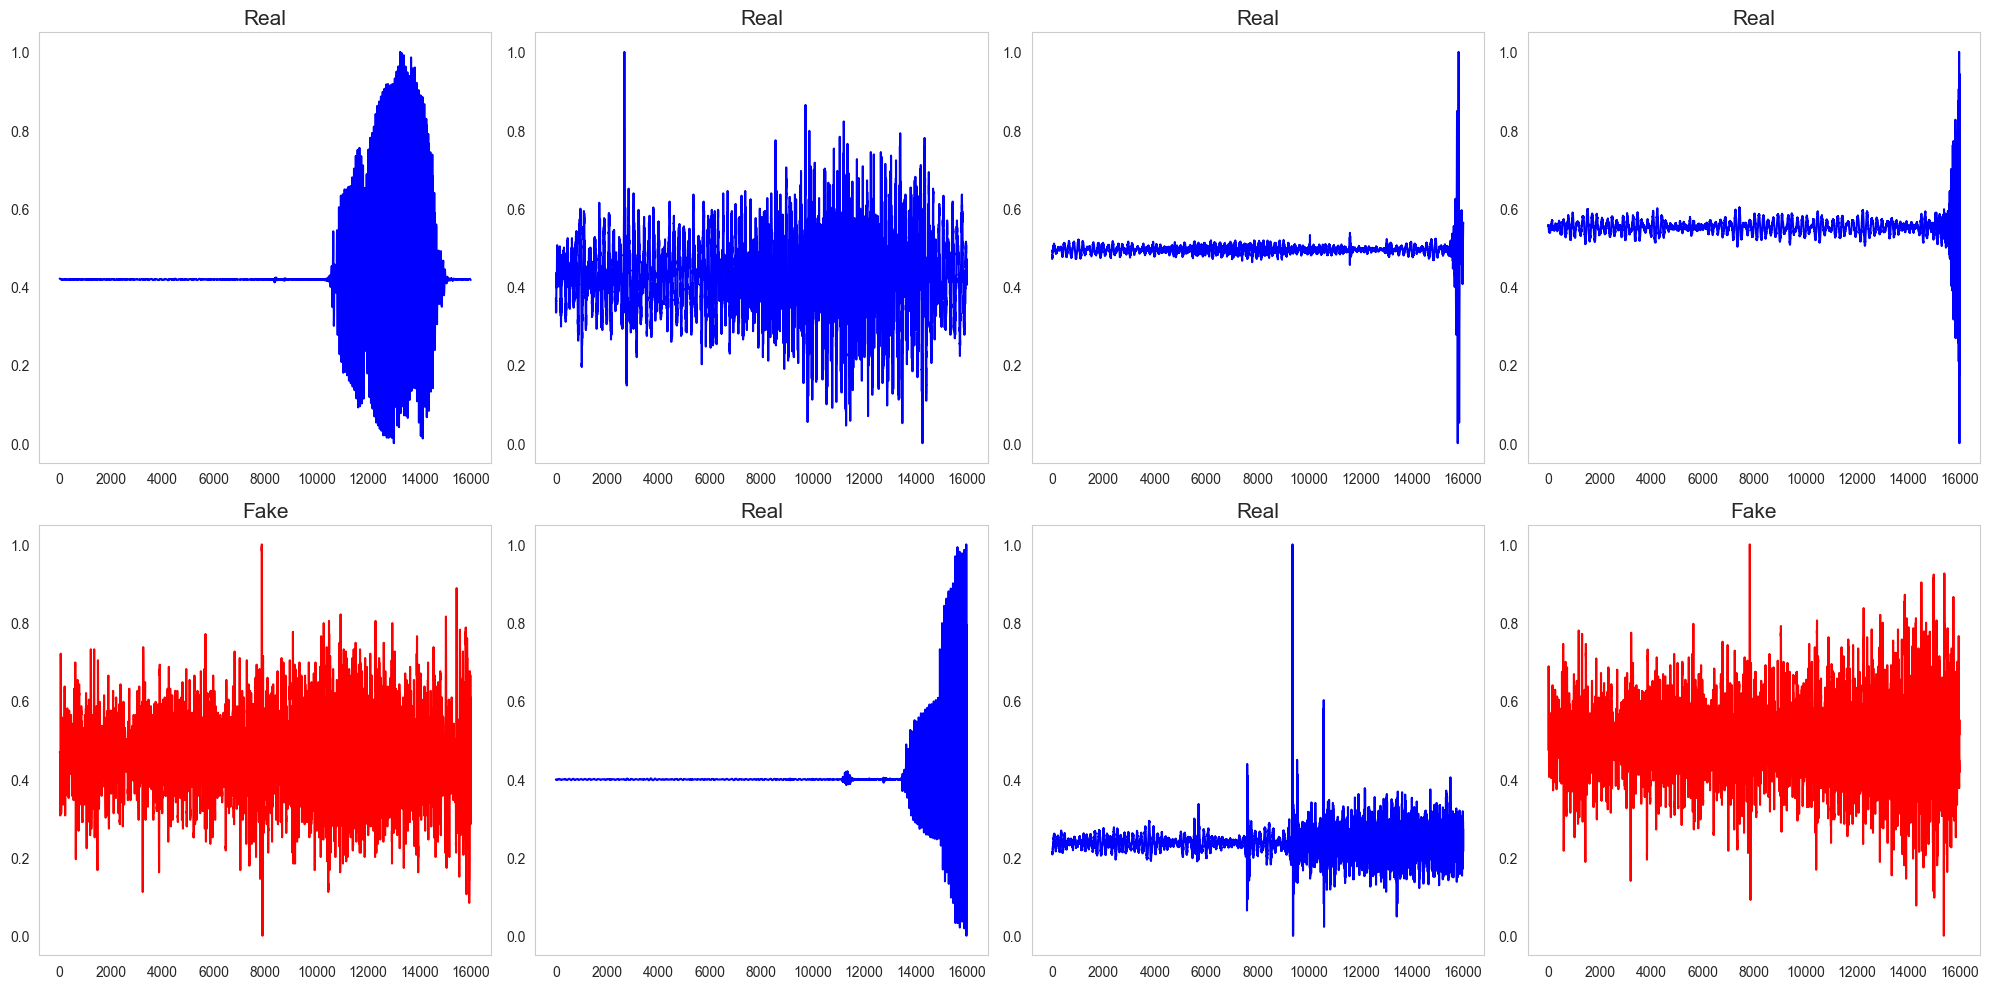

In [41]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE
TRAIN_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/train*.tfrec')
VALID_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/valid*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/test*.tfrec')
print('There are %i train, %i valid & %i test images'%(count_data_items(TRAIN_FILENAMES),
                                                       count_data_items(VALID_FILENAMES),
                                                       count_data_items(TEST_FILENAMES)))

There are 5000 train, 4000 valid & 4000 test images


In [42]:
class CFG:
    wandb = True
    project = "fake-speech-detection"
    debug = False
    exp_name = "v0"
    comment = "Conformer-128x80-cosine-no_aug-no_fc"

    # Use verbose=0 for silent, 1 for interactive
    verbose = 0
    display_plot = True

    # Device for training
    device = None  # device is automatically selected

    # Model & Backbone
    model_name = "Conformer"

    # Seeding for reproducibility
    seed = 101

    # Audio params
    sample_rate = 16000
    duration = 3.5 # duration in second
    audio_len = int(sample_rate * duration)
    normalize = True

    # Spectrogram params
    spec_freq = 128 # freq axis
    n_fft = 2048
    spec_time = 256 # time axis
    hop_len = audio_len//(spec_time - 1) # non-overlap region
    fmin = 20
    fmax = sample_rate//2 # max frequency
    spec_shape = [spec_time, spec_freq] # output spectrogram shape

    # Audio Augmentation
    timeshift_prob = 0.0
    gn_prob = 0.0

    # Spectrogram Augmentation
    time_mask = 20
    freq_mask = 10
    cutmix_prob = 0.0
    cutmix_alpha = 2.5
    mixup_prob = 0.0
    mixup_alpha = 2.5

    # Batch Size & Epochs
    batch_size = 32
    drop_remainder = False
    epochs = 12
    steps_per_execution = None

    # Loss & Optimizer & LR Scheduler
    loss = "binary_crossentropy"
    optimizer = "Adam"
    lr = 1e-4
    lr_schedule = "cosine"

    # Augmentation
    augment = False

    # Clip values to [0, 1]
    clip = False

In [43]:
def seeding(SEED):
    """
    Sets all random seeds for the program (Python, NumPy, and TensorFlow).
    """
    np.random.seed(SEED)
    random.seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    #     os.environ["TF_CUDNN_DETERMINISTIC"] = str(SEED)
    tf.random.set_seed(SEED)
    print("seeding done!!!")


seeding(CFG.seed)

seeding done!!!


In [44]:
def configure_device():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  # connect to tpu cluster
        strategy = tf.distribute.TPUStrategy(tpu) # get strategy for tpu
        print('> Running on TPU ', tpu.master(), end=' | ')
        print('Num of TPUs: ', strategy.num_replicas_in_sync)
        device='TPU'
    except: # otherwise detect GPUs
        tpu = None
        gpus = tf.config.list_logical_devices('GPU') # get logical gpus
        ngpu = len(gpus)
        if ngpu: # if number of GPUs are 0 then CPU
            strategy = tf.distribute.MirroredStrategy(gpus) # single-GPU or multi-GPU
            print("> Running on GPU", end=' | ')
            print("Num of GPUs: ", ngpu)
            device='GPU'
        else:
            print("> Running on CPU")
            strategy = tf.distribute.get_strategy() # connect to single gpu or cpu
            device='CPU'
    return strategy, device, tpu

In [45]:
strategy, CFG.device, tpu = configure_device()
AUTO = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

> Running on CPU
REPLICAS: 1


In [46]:
BASE_PATH = '/Users/morzahavi/Library/Mobile Documents/com~apple~CloudDocs/Downloads/asvspoof/LA'

# Train
train_df = pd.read_csv(f'{BASE_PATH}/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt',
                       sep=" ", header=None)
train_df.columns =['speaker_id','filename','system_id','null','class_name']
train_df.drop(columns=['null'],inplace=True)
train_df['filepath'] = f'{BASE_PATH}/ASVspoof2019_LA_train/flac/'+train_df.filename+'.flac'
train_df['target'] = (train_df.class_name=='spoof').astype('int32') # set labels 1 for fake and 0 for real
if True:
    train_df = train_df.groupby(['target']).sample(2500).reset_index(drop=True)
print(f'Train Samples: {len(train_df)}')
train_df.head(2)

Train Samples: 5000


,speaker_id,filename,system_id,class_name,filepath,target
0,LA_0079,LA_T_6200206,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0
1,LA_0085,LA_T_6638771,-,bonafide,/Users/morzahavi/Library/Mobile Documents/com~...,0


In [47]:
def random_int(shape=[], minval=0, maxval=1):
    return tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.int32)

def random_float(shape=[], minval=0.0, maxval=1.0):
    rnd = tf.random.uniform(shape=shape, minval=minval, maxval=maxval, dtype=tf.float32)
    return rnd

In [48]:
# Trim Audio to ignore silent part in the start and end
def TrimAudio(audio, epsilon=0.15):
    pos  = tfio.audio.trim(audio, axis=0, epsilon=epsilon)
    audio = audio[pos[0]:pos[1]]
    return audio

# Crop or Pad audio to keep a fixed length
def CropOrPad(audio, target_len, pad_mode='constant'):
    audio_len = tf.shape(audio)[0]
    if audio_len < target_len: # if audio_len is smaller than target_len then use Padding
        diff_len = (target_len - audio_len)
        pad1 = random_int([], minval=0, maxval=diff_len) # select random location for padding
        pad2 = diff_len - pad1
        pad_len = [pad1, pad2]
        audio = tf.pad(audio, paddings=[pad_len], mode=pad_mode) # apply padding
    elif audio_len > target_len:  # if audio_len is larger than target_len then use Cropping
        diff_len = (audio_len - target_len)
        idx = tf.random.uniform([], 0, diff_len, dtype=tf.int32) # select random location for cropping
        audio = audio[idx: (idx + target_len)]
    audio = tf.reshape(audio, [target_len])
    return audio

# Randomly shift audio -> any sound at <t> time may get shifted to <t+shift> time
def TimeShift(audio, prob=0.5):
    if random_float() < prob:
        shift = random_int(shape=[], minval=0, maxval=tf.shape(audio)[0])
        if random_float() < 0.5:
            shift = -shift
        audio = tf.roll(audio, shift, axis=0)
    return audio

# Apply random noise to audio data
def GaussianNoise(audio, std=[0.0025, 0.025], prob=0.5):
    std = random_float([], std[0], std[1])
    if random_float() < prob:
        GN = tf.keras.layers.GaussianNoise(stddev=std)
        audio = GN(audio, training=True) # training=False don't apply noise to data
    return audio

# Applies augmentation to Audio Signal
def AudioAug(audio):
    audio = TimeShift(audio, prob=CFG.timeshift_prob)
    audio = GaussianNoise(audio, prob=CFG.gn_prob)
    return audio

def Normalize(data):
    MEAN = tf.math.reduce_mean(data)
    STD = tf.math.reduce_std(data)
    data = tf.math.divide_no_nan(data - MEAN, STD)
    return data

In [49]:
# Randomly mask data in time and freq axis
def TimeFreqMask(spec, time_mask, freq_mask, prob=0.5):
    if random_float() < prob:
        spec = tfio.audio.freq_mask(spec, param=freq_mask)
        spec = tfio.audio.time_mask(spec, param=time_mask)
    return spec

# Applies augmentation to Spectrogram
def SpecAug(spec):
    spec = TimeFreqMask(spec, time_mask=CFG.time_mask, freq_mask=CFG.freq_mask, prob=0.5)
    return spec

# Compute MixUp Augmentation for Spectrogram
def get_mixup(alpha=0.2, prob=0.5):
    """Apply Spectrogram-MixUp augmentaiton. Apply Mixup to one batch and its shifted version"""
    def mixup(specs, labels, alpha=alpha, prob=prob):
        if random_float() > prob:
            return specs, labels

        spec_shape = tf.shape(specs)
        label_shape = tf.shape(labels)

        beta = tfp.distributions.Beta(alpha, alpha) # select lambda from beta distribution
        lam = beta.sample(1)[0]

        # It's faster to roll the batch by one instead of shuffling it to create image pairs
        specs = lam * specs + (1 - lam) * tf.roll(specs, shift=1, axis=0) # mixup = [1, 2, 3]*lam + [3, 1, 2]*(1 - lam)
        labels = lam * labels + (1 - lam) * tf.roll(labels, shift=1, axis=0)

        specs = tf.reshape(specs, spec_shape)
        labels = tf.reshape(labels, label_shape)
        return specs, labels
    return mixup


def get_cutmix(alpha, prob=0.5):
    """Apply Spectrogram-CutMix augmentaiton which only cuts patch across time axis unline
    typical Computer-Vision CutMix. Apply CutMix to one batch and its shifted version.
    """
    def cutmix(specs, labels, alpha=alpha, prob=prob):
        if random_float() > prob:
            return specs, labels
        spec_shape = tf.shape(specs)
        label_shape = tf.shape(labels)
        W = tf.cast(spec_shape[1], tf.int32)  # [batch, time, freq, channel]

        # Lambda from beta distribution
        beta = tfp.distributions.Beta(alpha, alpha)
        lam = beta.sample(1)[0]

        # It's faster to roll the batch by one instead of shuffling it to create image pairs
        specs_rolled = tf.roll(specs, shift=1, axis=0) # specs->[1, 2, 3], specs_rolled->[3, 1, 2]
        labels_rolled = tf.roll(labels, shift=1, axis=0)

        # Select random patch size
        r_x = random_int([], minval=0, maxval=W)
        r = 0.5 * tf.math.sqrt(1.0 - lam)
        r_w_half = tf.cast(r * tf.cast(W, tf.float32), tf.int32)

        # Select random location in time axis
        x1 = tf.cast(tf.clip_by_value(r_x - r_w_half, 0, W), tf.int32)
        x2 = tf.cast(tf.clip_by_value(r_x + r_w_half, 0, W), tf.int32)

        # outer-pad patch -> [0, 0, x, x, 0, 0]
        patch1 = specs[:, x1:x2, :, :]  # [batch, time, freq, channel]
        patch1 = tf.pad(
            patch1, [[0, 0], [x1, W - x2], [0, 0], [0, 0]])  # outer-pad

        # inner-pad-patch -> [y, y, 0, 0, y, y]
        patch2 = specs_rolled[:, x1:x2, :, :]  # [batch, mel, time, channel]
        patch2 = tf.pad(
            patch2, [[0, 0], [x1, W - x2], [0, 0], [0, 0]])  # outer-pad
        patch2 = specs_rolled - patch2  # inner-pad-patch = img - outer-pad-patch

        # patch1 -> [0, 0, x, x, 0, 0], patch2 -> [y, y, 0, 0, y, y]
        # cutmix = (patch1 + patch2) -> [y, y, x, x, y, y]
        specs = patch1 + patch2  # cutmix img

        # Compute lambda = [1 - (patch_area/image_area)]
        lam = tf.cast((1.0 - (x2 - x1) / (W)),tf.float32)  # no H term as (y1 - y2) = H
        labels = lam * labels + (1.0 - lam) * labels_rolled  # cutmix label

        specs = tf.reshape(specs, spec_shape)
        labels = tf.reshape(labels, label_shape)

        return specs, labels
    return cutmix

In [50]:
# Compute Spectrogram from audio
def Audio2Spec(audio,spec_shape=[256, 128],sr=16000,nfft=2048,window=2048,fmin=20,fmax=8000):
    spec_time = spec_shape[0]
    spec_freq = spec_shape[1]
    audio_len = tf.shape(audio)[0]
    hop_length = tf.cast((audio_len // (spec_time - 1)), tf.int32) # compute hop_length to keep desired spec_shape
    spec = tfio.audio.spectrogram(audio, nfft=nfft, window=window, stride=hop_length) # convert to spectrogram
    mel_spec = tfio.audio.melscale(spec, rate=sr, mels=spec_freq, fmin=fmin, fmax=fmax) # transform to melscale
    db_mel_spec = tfio.audio.dbscale(mel_spec, top_db=80) # from power to db (log10) scale
    if tf.shape(db_mel_spec)[0] > spec_time:  # check if we have desiered shape
        db_mel_spec = db_mel_spec[:spec_time,:]
    db_mel_spec = tf.reshape(db_mel_spec, spec_shape)
    return db_mel_spec

# Convert spectrogram (H,W) to image (H,W,1)
def Spec2Img(spec, num_channels=1):
    # 1 channel image
    img = spec[..., tf.newaxis]
    # Copy same image across channel axis
    if num_channels>1:
        img = tf.tile(img, [1, 1, num_channels])
    return img

In [51]:
# Decode audio from wav
def decode_audio(data, audio_len):
    # Decode
    audio, sr = tf.audio.decode_wav(data)
    audio = tf.reshape(audio, [audio_len]) # explicit size needed for TPU
    audio = tf.cast(audio,tf.float32)
    # Normalization
    if CFG.normalize:
        audio = Normalize(audio)
    return audio

# Decode label
def decode_label(label):
    label = tf.cast(label, tf.float32)
    return label

# Read tfrecord data & parse it & do augmentation
def read_tfrecord(example, augment=True, return_id=False, return_label=True, target_len=CFG.audio_len, spec_shape=CFG.spec_shape):
    tfrec_format = {
        "audio" : tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id" : tf.io.FixedLenFeature([], tf.string),
        "speaker_id": tf.io.FixedLenFeature([], tf.string),
        "system_id" : tf.io.FixedLenFeature([], tf.string),
        "audio_len" : tf.io.FixedLenFeature([], tf.int64),
        "target" : tf.io.FixedLenFeature([], tf.int64),
    }
    # Parses a single example proto.
    example = tf.io.parse_single_example(
        example, tfrec_format
    )
    # Extract data from example proto
    audio_id = example["id"]
    audio_len = example["audio_len"]
    # Decoding
    audio = decode_audio(example["audio"], audio_len)  # decode audio from .wav
    target = decode_label(example["target"]) # decode label -> type cast
    # Trim Audio
    audio = TrimAudio(audio)
    # Crop or Pad audio to keep a fixed length
    audio = CropOrPad(audio, target_len)
    if augment:
        # Apply AudioAug
        audio = AudioAug(audio)
    # Compute Spectrogram
    spec = Audio2Spec(audio, spec_shape=spec_shape)
    if augment:
        # Apply SpecAug
        spec = SpecAug(spec)
    # Spectrogram (H, W) to Image (H, W, C)
    img = Spec2Img(spec, num_channels=1)
    # Clip & Reshape
    img = tf.clip_by_value(img, 0, 1) if CFG.clip else img
    img = tf.reshape(img, [*spec_shape, 1])

    if not return_id:
        if return_label:
            return (img, target)
        else:
            return img
    else:
        if return_label:
            return (img, target, audio_id)
        else:
            return (img, audio_id)

In [52]:
def get_dataset(
        filenames,
        shuffle=True,
        repeat=True,
        augment=True,
        cache=True,
        return_id=False,
        return_label=True,
        batch_size=CFG.batch_size * REPLICAS,
        target_len=CFG.audio_len,
        spec_shape=CFG.spec_shape,
        drop_remainder=False,
        seed=CFG.seed,
):
    # Real tfrecord files
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)
    if cache:
        dataset = dataset.cache()  # cache data for speedup
    if repeat:
        dataset = dataset.repeat()  # repeat the data (for training only)
    if shuffle:
        dataset = dataset.shuffle(1024, seed=seed)  # shuffle the data (for training only)
        options = tf.data.Options()
        options.experimental_deterministic = False  # order won't be maintained when we shuffle
        dataset = dataset.with_options(options)
    # Parse data from tfrecord
    dataset = dataset.map(lambda x: read_tfrecord(x,
                                                  augment=augment,
                                                  return_id=return_id,
                                                  return_label=return_label,
                                                  target_len=target_len,),
                          num_parallel_calls=AUTO,)
    # Batch Data Samples
    dataset = dataset.batch(batch_size, drop_remainder=drop_remainder)
    # MixUp
    if CFG.mixup_prob and augment and return_label:
        dataset = dataset.map(get_mixup(alpha=CFG.mixup_alpha,prob=CFG.mixup_prob),num_parallel_calls=AUTO)
    # CutMix
    if CFG.cutmix_prob and augment and return_label:
        dataset = dataset.map(get_cutmix(alpha=CFG.cutmix_alpha,prob=CFG.cutmix_prob),num_parallel_calls=AUTO)
    # Prefatch data for speedup
    dataset = dataset.prefetch(AUTO)
    return dataset

In [53]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          save = False):
    """Plot Confusion Matrix"""
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    return

def plot_history(history):
    """Plot model training history"""
    plt.figure(figsize=(15, 5))
    plt.plot(
        np.arange(len(history["f1_score"])),
        history["f1_score"],
        "-o",
        label="Train f1_score",
        color="#ff7f0e",
    )
    plt.plot(
        np.arange(len(history["f1_score"])),
        history["val_f1_score"],
        "-o",
        label="Val f1_score",
        color="#1f77b4",
    )
    x = np.argmax(history["val_f1_score"])
    y = np.max(history["val_f1_score"])
    xdist = plt.xlim()[1] - plt.xlim()[0]
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x, y, s=200, color="#1f77b4")
    plt.text(x - 0.03 * xdist, y - 0.13 * ydist, "max f1_score\n%.2f" % y, size=14)
    plt.ylabel("f1_score", size=14)
    plt.xlabel("Epoch", size=14)
    plt.legend(loc=2)
    plt2 = plt.gca().twinx()
    plt2.plot(
        np.arange(len(history["f1_score"])),
        history["loss"],
        "-o",
        label="Train Loss",
        color="#2ca02c",
    )
    plt2.plot(
        np.arange(len(history["f1_score"])),
        history["val_loss"],
        "-o",
        label="Val Loss",
        color="#d62728",
    )
    x = np.argmin(history["val_loss"])
    y = np.min(history["val_loss"])
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x, y, s=200, color="#d62728")
    plt.text(x - 0.03 * xdist, y + 0.05 * ydist, "min loss", size=14)
    plt.ylabel("Loss", size=14)
    plt.legend(loc=3)
    plt.savefig(f"history_plot.png")
    plt.show()
    return

def display_batch(batch, row=2, col=5):
    "Plot one batch data"
    imgs, tars = batch
    plt.figure(figsize=(5.0*col, 3.5*row))
    for idx in range(row*col):
        img = imgs[idx].numpy().transpose()[0]
        tar = tars[idx].numpy()
        plt.subplot(row, col, idx+1)
        plt.imshow(img, cmap='coolwarm')
        text = 'Fake' if tar else 'Real'
        plt.title(text, fontsize=15, color=('red' if tar else 'green'))
    plt.tight_layout();
    plt.grid(False)
    plt.show();
    return

2023-07-23 21:06:51.146747: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.148524: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.148984: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.149288: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.166115: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.171663: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:06:51.172690: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed 

image_shape: (20, 256, 128, 1) target_shape:(20,)
image_dtype: <dtype: 'float32'> target_dtype:<dtype: 'float32'>


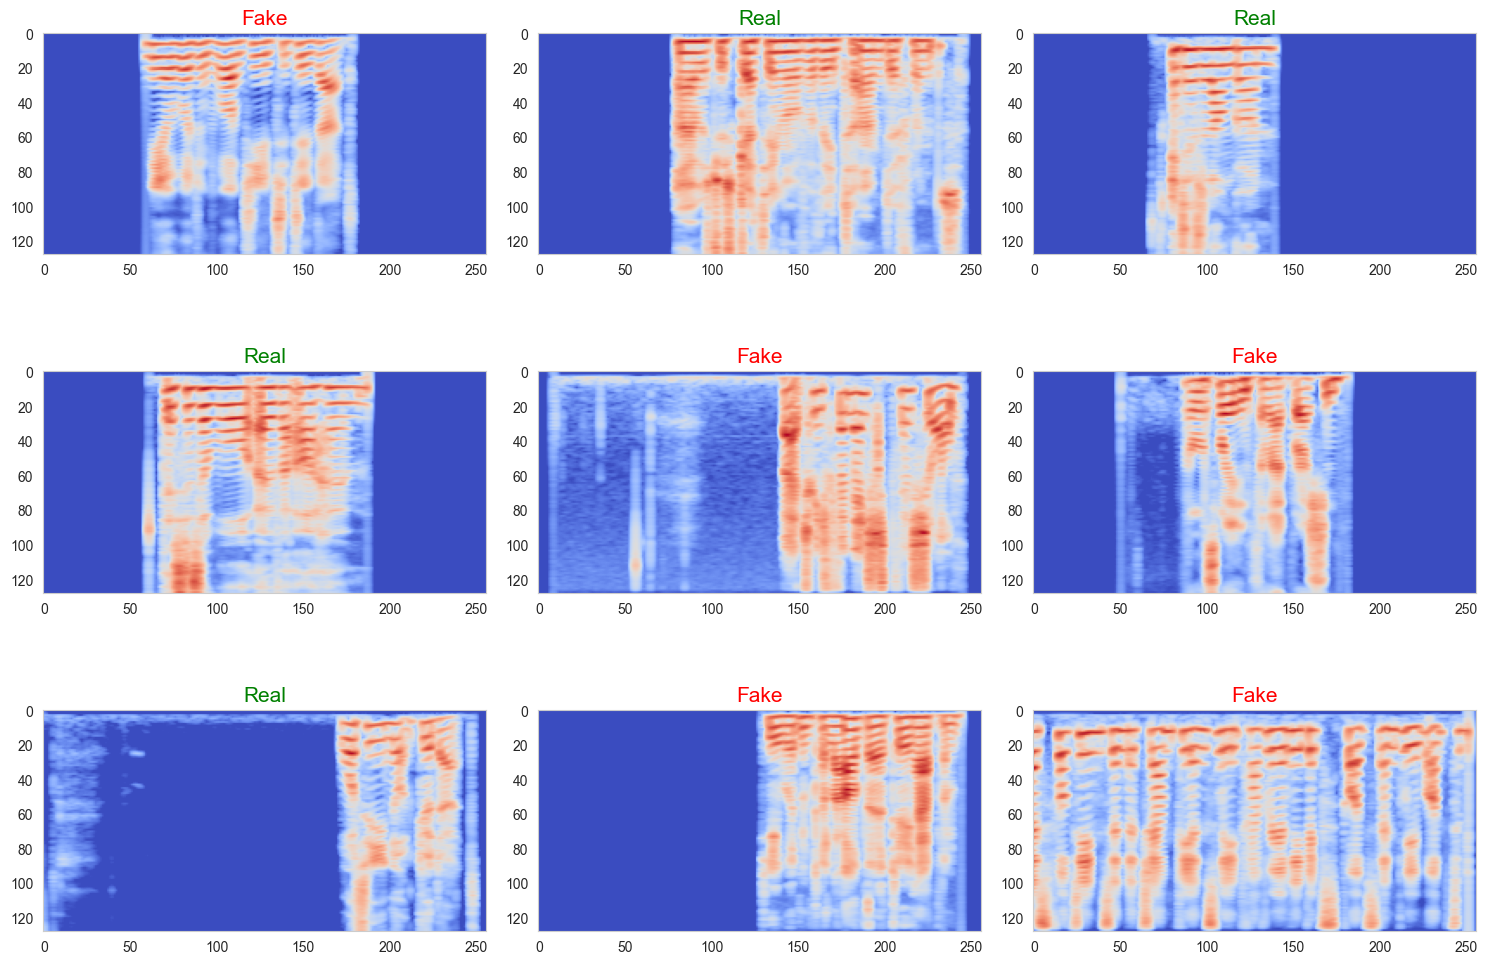

In [54]:
import tensorflow_io as tfio
ds = get_dataset(TRAIN_FILENAMES[:2], augment=False, cache=False, repeat=False).take(1)
batch = next(iter(ds.unbatch().batch(20)))
imgs, tars = batch
print(f'image_shape: {imgs.shape} target_shape:{tars.shape}')
print(f'image_dtype: {imgs.dtype} target_dtype:{tars.dtype}')
display_batch(batch, row=3, col=3)

2023-07-23 21:07:02.752228: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.754938: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.755962: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.756538: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.767630: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.771298: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:02.771690: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed 

image_shape: (20, 256, 128, 1) target_shape:(20,)
image_dtype: <dtype: 'float32'> target_dtype:<dtype: 'float32'>


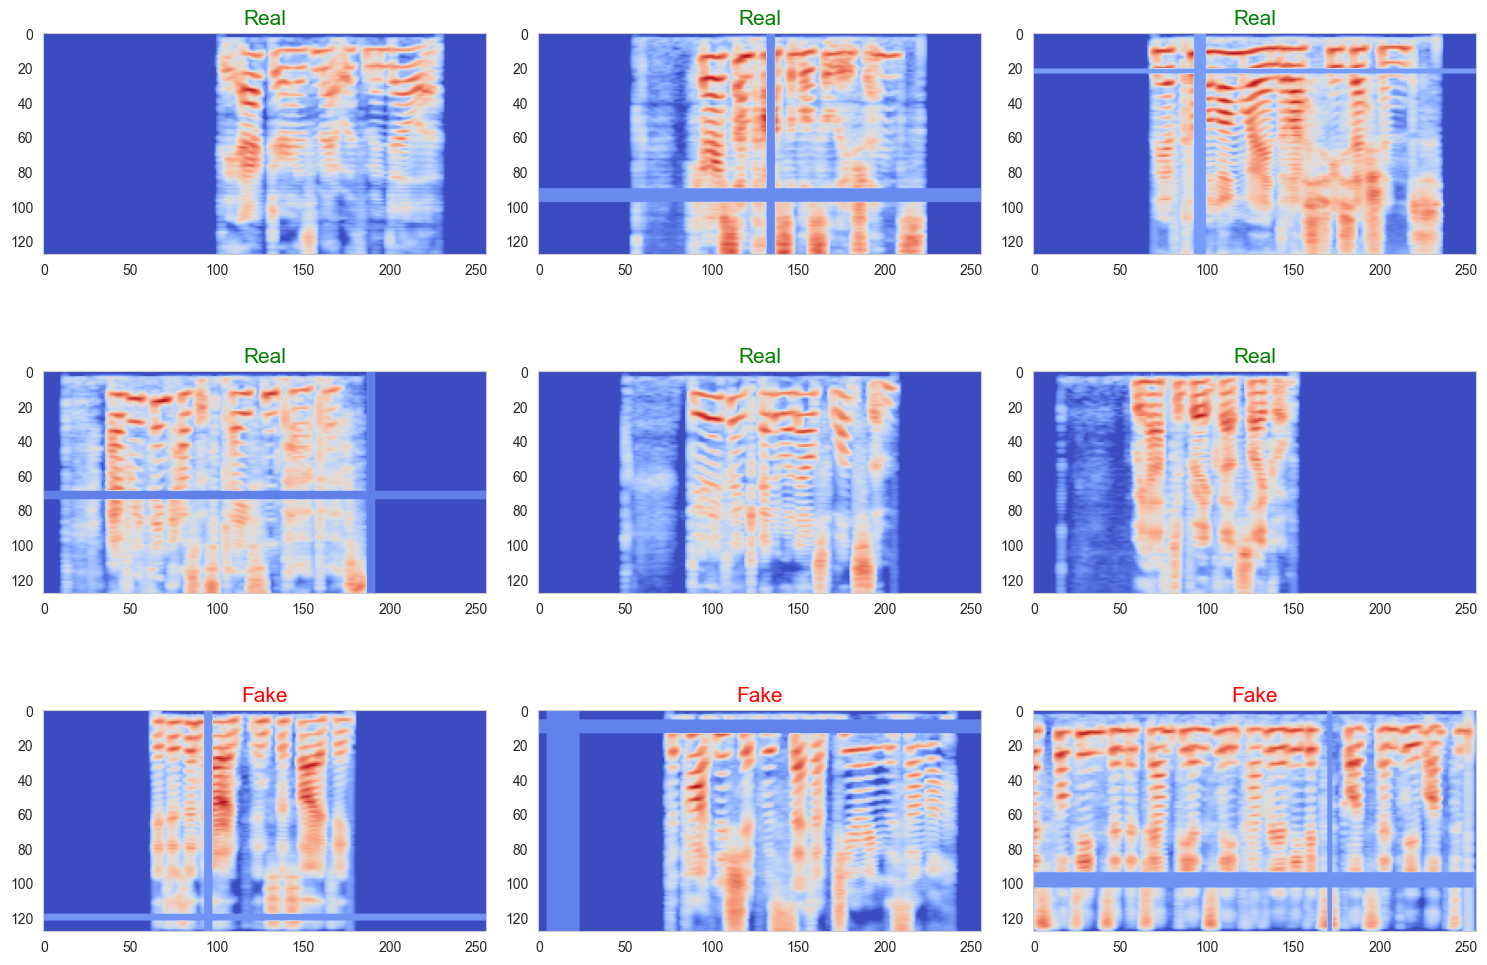

In [55]:
ds = get_dataset(TRAIN_FILENAMES[:2], augment=True, cache=False, repeat=False).take(1)
batch = next(iter(ds.unbatch().batch(20)))
imgs, tars = batch
print(f'image_shape: {imgs.shape} target_shape:{tars.shape}')
print(f'image_dtype: {imgs.dtype} target_dtype:{tars.dtype}')
display_batch(batch, row=3, col=3)

In [56]:
def get_metrics():
    acc = tf.keras.metrics.BinaryAccuracy()
    f1_score = tfa.metrics.F1Score(num_classes=1, threshold=0.5, average='macro')
    precision = tf.keras.metrics.Precision()
    recall = tf.keras.metrics.Recall()
    return [acc, precision, recall, f1_score]

In [57]:
def get_lr_callback(cfg):
    lr_start   = cfg['LR_START']
    lr_max     = cfg['LR_MAX'] * strategy.num_replicas_in_sync
    lr_min     = cfg['LR_MIN']
    lr_ramp_ep = cfg['LR_RAMPUP_EPOCHS']
    lr_sus_ep  = cfg['LR_SUSTAIN_EPOCHS']
    lr_decay   = cfg['LR_EXP_DECAY']

    def lrfn(epoch):
        if epoch < lr_ramp_ep:
            lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

        elif epoch < lr_ramp_ep + lr_sus_ep:
            lr = lr_max

        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

        return lr

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=False)
    return lr_callback

In [58]:
import audio_classification_models as acm
model = acm.Conformer(input_shape=(128,80,1), pretrain=True)

In [59]:
import audio_classification_models as acm

URL = 'https://github.com/awsaf49/audio_classification_models/releases/download/v1.0.8/conformer-encoder.h5'

def Conformer(input_shape=(128, 80, 1),num_classes=1, final_activation='sigmoid', pretrain=True):
    """Souce Code: https://github.com/awsaf49/audio_classification_models"""
    inp = tf.keras.layers.Input(shape=input_shape)
    backbone = acm.ConformerEncoder()
    out = backbone(inp)
    if pretrain:
        acm.utils.weights.load_pretrain(backbone, url=URL)
    out = tf.keras.layers.GlobalAveragePooling1D()(out)
    #     out = tf.keras.layers.Dense(32, activation='selu')(out)
    out = tf.keras.layers.Dense(num_classes, activation=final_activation)(out)
    model = tf.keras.models.Model(inp, out)
    return model

In [60]:
def get_model(name=CFG.model_name, loss=CFG.loss,):
    model = Conformer(input_shape=[*CFG.spec_shape,1],pretrain=True)
    lr = CFG.lr
    if CFG.optimizer == "Adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif CFG.optimizer == "AdamW":
        opt = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=lr)
    elif CFG.optimizer == "RectifiedAdam":
        opt = tfa.optimizers.RectifiedAdam(learning_rate=lr)
    else:
        raise ValueError("Wrong Optimzer Name")
    model.compile(
        optimizer=opt,
        loss=loss,
        steps_per_execution=CFG.steps_per_execution, # to reduce idle time
        metrics=get_metrics()
    )
    return model

In [61]:
import tensorflow_addons as tfa
model = get_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 128, 1)]     0         
_________________________________________________________________
conformer_encoder (Conformer (None, None, 144)         8959680   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 144)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 145       
Total params: 8,959,825
Trainable params: 8,955,217
Non-trainable params: 4,608
_________________________________________________________________


In [62]:
strategy, CFG.device, tpu = configure_device()
AUTO = tf.data.experimental.AUTOTUNE
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

> Running on CPU
REPLICAS: 1


In [63]:
# config = model.get_config() # Returns pretty much every information about your model
# print(config["layers"][0]["config"]["batch_input_shape"]) # returns a tuple of width, height and channels

In [64]:
get_metrics()

In [65]:
if CFG.wandb:
    "login in wandb otherwise run anonymously"
    try:
        # Addo-ons > Secrets > WANDB
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        api_key = user_secrets.get_secret("WANDB")
        wandb.login(key=api_key)
        anonymous = None
    except:
        anonymous = "must"


def wandb_init():
    "initialize project on wandb"
    id_ = wandb.util.generate_id() # generate random id
    config = {k: v for k, v in dict(vars(CFG)).items() if "__" not in k} # convert class to dict
    config["id"] = id_
    run = wandb.init(
        id=id_,
        project="fake-speech-detection",
        name=f"dim-{CFG.spec_shape[0]}x{CFG.spec_shape[1]}|model-{CFG.model_name}",
        config=config,
        anonymous=anonymous,
        group=CFG.comment,
        reinit=True,
        resume="allow",
    )
    return run

In [ ]:
# Initialize wandb Run
if CFG.wandb:
    run = wandb_init()
    WandbCallback = wandb.keras.WandbCallback(save_model=False)

# Load gcs_path of train, valid & test
TRAIN_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/train*.tfrec')
VALID_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/valid*.tfrec')
TEST_FILENAMES = tf.io.gfile.glob('/tmp/asvspoof/test*.tfrec')

TRAIN_FILENAMES = TRAIN_FILENAMES[:2]
VALID_FILENAMES = VALID_FILENAMES[:2]
TEST_FILENAMES = TEST_FILENAMES[:2]

# Take Only 10 Files if run in Debug Mode
if CFG.debug:
    TRAIN_FILENAMES = TRAIN_FILENAMES[:2]
    VALID_FILENAMES = VALID_FILENAMES[:2]
    TEST_FILENAMES = TEST_FILENAMES[:2]

# Shuffle train files
random.shuffle(TRAIN_FILENAMES)

# Count train and valid samples
NUM_TRAIN = count_data_items(TRAIN_FILENAMES)
NUM_VALID = count_data_items(VALID_FILENAMES)
NUM_TEST = count_data_items(TEST_FILENAMES)

# Compute batch size & steps_per_epoch
BATCH_SIZE = CFG.batch_size * REPLICAS
STEPS_PER_EPOCH = NUM_TRAIN // BATCH_SIZE

print("#" * 60)
print("#### IMAGE_SIZE: (%i, %i) | BATCH_SIZE: %i | EPOCHS: %i"% (CFG.spec_shape[0],
                                                                  CFG.spec_shape[1],
                                                                  BATCH_SIZE,
                                                                  CFG.epochs))
print("#### MODEL: %s | LOSS: %s"% (CFG.model_name, CFG.loss))
print("#### NUM_TRAIN: {:,} | NUM_VALID: {:,}".format(NUM_TRAIN, NUM_VALID))
print("#" * 60)

# Log in w&B before training
if CFG.wandb:
    wandb.log(
        {
            "num_train": NUM_TRAIN,
            "num_valid": NUM_VALID,
            "num_test": NUM_TEST,
        }
    )

# Build model in device
K.clear_session()
with strategy.scope():
    model = get_model(name=CFG.model_name,loss=CFG.loss)

# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/kaggle/working/ckpt.h5",
    verbose=CFG.verbose,
    monitor="val_f1_score",
    mode="max",
    save_best_only=True,
    save_weights_only=True,
)
# callbacks = [checkpoint, get_lr_callback(mode=CFG.lr_schedule,epochs=CFG.epochs)]

# if CFG.wandb:
    # Include w&b callback if WANDB is True
    # callbacks.append(WandbCallback)

# Create train & valid dataset
train_ds = get_dataset(
    TRAIN_FILENAMES,
    augment=CFG.augment,
    batch_size=BATCH_SIZE,
    cache=False,
    drop_remainder=False,
)
valid_ds = get_dataset(
    VALID_FILENAMES,
    shuffle=False,
    augment=False,
    repeat=False,
    batch_size=BATCH_SIZE,
    cache=False,
    drop_remainder=False,
)

# Train model
history = model.fit(
    train_ds,
    epochs=CFG.epochs if not CFG.debug else 2,
    steps_per_epoch=STEPS_PER_EPOCH,
    # callbacks=callbacks,
    validation_data=valid_ds,
    #         validation_steps = NUM_VALID/BATCH_SIZE,
    verbose=CFG.verbose,
)

# Convert dict history to df history
history = pd.DataFrame(history.history)

# Load best weights
model.load_weights("/kaggle/working/ckpt.h5")

# Plot Training History
if CFG.display_plot:
    plot_history(history)

############################################################
#### IMAGE_SIZE: (256, 128) | BATCH_SIZE: 32 | EPOCHS: 12
#### MODEL: Conformer | LOSS: binary_crossentropy
#### NUM_TRAIN: 1,000 | NUM_VALID: 800
############################################################


2023-07-23 21:07:54.421716: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.424561: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.424890: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.425129: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.434808: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.436775: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at functional_ops.cc:374 : Internal: No function library
2023-07-23 21:07:54.437040: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed 